<a href="https://colab.research.google.com/github/malienist/FIRST-JP/blob/main/SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision foolbox matplotlib numpy

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import SVHN
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import foolbox as fb
from foolbox.attacks import LinfPGD
from foolbox.criteria import Misclassification

# Load SVHN dataset
transform = transforms.Compose([transforms.ToTensor()])
testset = SVHN(root='./data', split='test', download=True, transform=transform)
testloader = DataLoader(testset, batch_size=1, shuffle=True)

# Define a simple model (using pretrained ResNet18 for demonstration)
model = torchvision.models.resnet18(pretrained=True)
model.eval()

Using downloaded and verified file: ./data/test_32x32.mat


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Create Foolbox model
fmodel = fb.PyTorchModel(model, bounds=(0, 1))

# Select a sample image from the testset
images, labels = next(iter(testloader))

# Apply an adversarial attack
attack = fb.attacks.FGSM()
criterion = Misclassification(labels) # Pass the true labels to the Misclassification criterion
epsilons = [0.03]
adversarials = attack(fmodel, images, criterion, epsilons=epsilons) # Generate adversarial images

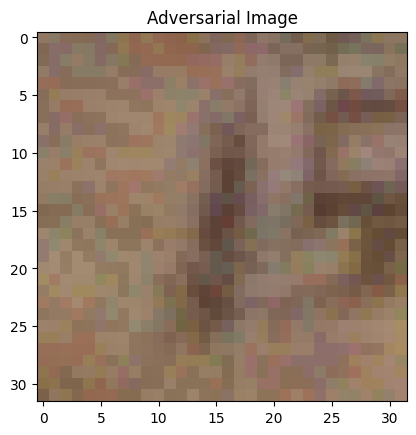

Original label: 1
Adversarial label: 276


In [ ]:
# Convert the adversarials variable to a tensor
adversarial = adversarials[0][0].cpu().numpy().squeeze() # Select the first adversarial image
plt.imshow(adversarial.transpose(1, 2, 0))
plt.title("Adversarial Image")
plt.show()

# Convert the adversarial variable to a PyTorch tensor
adversarial = torch.from_numpy(adversarial)

# Convert the adversarial variable to a 4-dimensional tensor
adversarial = adversarial.unsqueeze(0)

# Check if the attack was successful
print("Original label:", labels.item())
print("Adversarial label:", torch.argmax(model(adversarial), dim=1).item())